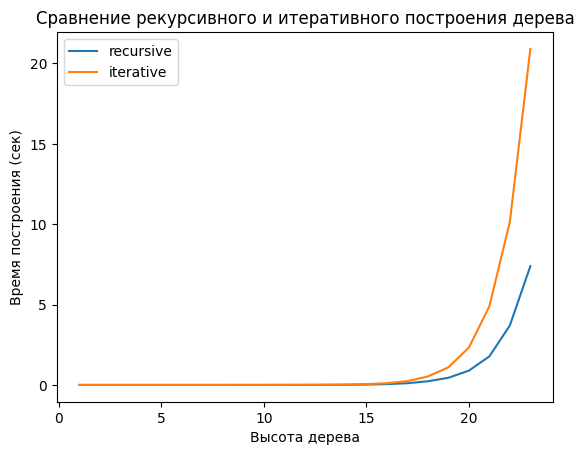

'\nВывод: Время выполнения обеих функций почти одинаковое. До высоты 14 разница во времени между двумя построениями незначительна, с высоты 15 рекурсивная функция справляется быстрее. \nДля более маленьких деревьев выгоднее применять рекурсивную функцию, а для больших итеративную, так как она эффективнее по памяти.\n\n'

In [2]:
from typing import Callable
import timeit
import matplotlib.pyplot as plt
import random

def build_tree_recursive(height: int, root: int, l: Callable[[int], int] = lambda x: x * 2 + 1, r: Callable[[int], int] = lambda x: 2 * x - 1) -> dict[str, list]:
    if height == 0:
        return {str(root): []}
    left = build_tree_recursive(height - 1, l(root), l, r)
    right = build_tree_recursive(height - 1, r(root), l, r)
    return {str(root): [left, right]}

def build_tree_iterative(height: int, root: int, l: Callable[[int], int] = lambda x: x * 2 + 1, r: Callable[[int], int] = lambda x: 2 * x - 1) -> dict[str, list]:
    if height < 0:
        return {}

    tree = {str(root): []}
    current_level = [(root, str(root))]

    for _ in range(height):
        next_level = []
        for root_value, key in current_level:
            left_val = l(root_value)
            right_val = r(root_value)

            tree[str(left_val)] = []
            tree[str(right_val)] = []
            tree[key].append({str(left_val): tree[str(left_val)]})
            tree[key].append({str(right_val): tree[str(right_val)]})

            next_level.append((left_val, str(left_val)))
            next_level.append((right_val, str(right_val)))

        current_level = next_level

    return {str(root): tree[str(root)]}

def benchmark(func, *args, repeat=5):
    """Возвращает минимальное время выполнения func(*args) за repeat повторов"""
    times = timeit.repeat(lambda: func(*args), number=1, repeat=repeat)
    return min(times)

def main():
    # random.seed(42)
    test_data = list(range(1, 24))  # высоты деревьев

    res_recursive = []
    res_iterative = []

    for n in test_data:
        res_recursive.append(benchmark(build_tree_recursive, n, 0))
        res_iterative.append(benchmark(build_tree_iterative, n, 0))

    # Построение графика
    plt.plot(test_data, res_recursive, label="recursive")
    plt.plot(test_data, res_iterative, label="iterative")
    plt.xlabel("Высота дерева")
    plt.ylabel("Время построения (сек)")
    plt.title("Сравнение рекурсивного и итеративного построения дерева")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
"""
Вывод: Время выполнения обеих функций почти одинаковое. До высоты 14 разница во времени между двумя построениями незначительна, с высоты 15 рекурсивная функция справляется быстрее. 
Для более маленьких деревьев выгоднее применять рекурсивную функцию, а для больших итеративную, так как она эффективнее по памяти.

"""